In [1]:
!pip install -U finance-datareader

     |████████████████████████████████| 5.4 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 9.7 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 745 kB/s eta 0:00:011
     |████████████████████████████████| 178 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 136 kB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 14.9 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 11.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ubuntu/.pyenv/versions/3.9.1/envs/stock-env/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd

In [6]:
# FinaceDataReader 를 fdr 병칭으로 불러옵니다.
# 라이브러리의 version을 확인하고 싶을 때는 .__version__ 으로 확인합니다.
import FinanceDataReader as fdr

fdr.__version__

'0.9.14'

In [7]:
# 도움말을 보고자 할때는 ? 를 사용하고 소스코드를 볼 때는 ??를 사용합니다.
# 주피터 노트북에서는 함수나 메소드의 괄호 안에서 shift + tab 키를 누르면 도움말을 볼 수 있습니다.

fdr.StockListing??

In [8]:
# KRX: KRX 종목 전체
# KOSPI: KOSPI 종목
# KOSDAQ : KOSDAQ 종목
# KONEX : KONEX 종목
# NASDAQ : 나스닥 종목
# NYSE : 뉴욕증권거래소 종목
# SP500 : S6P500 종목

df_krx = fdr.StockListing("KRX")
df_krx.shape

(6669, 10)

In [18]:
# 행과 열의 크기를 봅니다. (행, 열) 순
df_krx.shape

(6676, 10)

In [9]:
# 전체 데이터프레임의 요약정보를 봅니다.
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6669 entries, 0 to 6668
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6669 non-null   object        
 1   Market          6669 non-null   object        
 2   Name            6669 non-null   object        
 3   Sector          2413 non-null   object        
 4   Industry        2394 non-null   object        
 5   ListingDate     2413 non-null   datetime64[ns]
 6   SettleMonth     2413 non-null   object        
 7   Representative  2413 non-null   object        
 8   HomePage        2240 non-null   object        
 9   Region          2413 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 573.1+ KB


In [23]:
# 기술통계 값을 요약합니다.

df_krx.describe()

<ipython-input-23-61b34dcf1498>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_krx.describe()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,6676,6676,6676,2412,2393,2412,2412,2412,2240,2412
unique,6676,3,6676,158,2241,1777,9,2297,2219,21
top,57FW26,KOSPI,인지디스플레,특수 목적용 기계 제조업,기업인수합병,1976-06-30 00:00:00,12월,-,http://www.sempio.com,서울특별시
freq,1,5039,1,141,36,8,2352,5,2,972
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-01-21 00:00:00,NaN,NaN,NaN,NaN


In [10]:
# to_csv 로 Dataframe을 데이터 저장용 파일인 CSV 파일로 바꿀 수 있습니다.
df_krx.to_csv("krx.csv", index=False)

In [11]:
# CSV로 저장된 파일을 다시 DataFrame으로 읽어서 확인해 봅니다.
pd.read_csv("krx.csv")

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6664,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6667,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [15]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
# 수치 기반 라이브러리 numpy
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
df = pd.read_csv("krx.csv")
df.shape

(6669, 10)

In [21]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [20]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
6664,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6667,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시
6668,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [19]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다.
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5122,57FL54,KOSPI,한국FL54KOSPI200풋,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 데이터 요약하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          6669 non-null   object
 1   Market          6669 non-null   object
 2   Name            6669 non-null   object
 3   Sector          2413 non-null   object
 4   Industry        2394 non-null   object
 5   ListingDate     2413 non-null   object
 6   SettleMonth     2413 non-null   object
 7   Representative  2413 non-null   object
 8   HomePage        2240 non-null   object
 9   Region          2413 non-null   object
dtypes: object(10)
memory usage: 521.1+ KB


In [25]:
# describe 로 기술통계값을 봅니다.
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,6669,6669,6669,2413,2394,2413,2413,2413,2240,2413
unique,6669,3,6669,158,2242,1778,9,2298,2219,21
top,036480,KOSPI,미래FC04KOSPI200콜,특수 목적용 기계 제조업,기업인수합병,1996-07-03,12월,-,http://www.sempio.com,서울특별시
freq,1,5032,1,141,36,8,2353,5,2,973


In [28]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            6669
Market               3
Name              6669
Sector             158
Industry          2242
ListingDate       1778
SettleMonth          9
Representative    2298
HomePage          2219
Region              21
dtype: int64

In [30]:
# index 값 보기
df.index

RangeIndex(start=0, stop=6669, step=1)

In [32]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [34]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '이현우',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호, 염두성 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

In [36]:
pd.DataFrame(df.values)

,0,1,2,3,4,5,6,7,8,9
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6664,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6665,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6666,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6667,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [39]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
6664    흥국화재2우B
6665      흥국화재우
6666       흥아해운
6667         희림
6668         힘스
Name: Name, Length: 6669, dtype: object

In [42]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [47]:
# 0번째 행만 가져옵니다. 행 인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                   특수 목적용 기계 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [49]:
# df.loc[0]의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

In [51]:
type(df)

pandas.core.frame.DataFrame

In [58]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다.
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요.
df[["Name", "Symbol"]].head()

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


In [60]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0, 1]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시


In [63]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
6664,흥국화재2우B
6665,흥국화재우
6666,흥아해운
6667,희림


In [67]:
# 행과 열 함께 가져오기
# .loc[행, 열]
# 데이터프레임에 두번 접근하게됨
# 그래서 아래 방법 추천
df["Name"][0]

'3S'

In [69]:
df.loc[0, "Name"]

'3S'

In [73]:
# 여러 개의 행과 하나의 컬럼 가져오기
df.loc[[0,1,2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [76]:
# 여러개의 행과 여러개의 열 가져오기
df.loc[[0,1,2], ["Name", "Sector"]]

,Name,Sector
0,3S,특수 목적용 기계 제조업
1,AJ네트웍스,산업용 기계 및 장비 임대업
2,AK홀딩스,기타 금융업


In [99]:
# 카카오를 찾습니다.
df["Name"] == "카카오"
df["Market"] == "KOSPI"

0       False
1        True
2        True
3       False
4       False
        ...  
6664     True
6665     True
6666     True
6667    False
6668    False
Name: Market, Length: 6669, dtype: bool

In [116]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Name", "Symbol"]]

,Name,Symbol
1,AJ네트웍스,095570
2,AK홀딩스,006840
46,BGF,027410
47,BGF리테일,282330
49,BYC,001460
...,...,...
6652,휴비스,079980
6654,휴스틸,005010
6658,휴켐스,069260
6663,흥국화재,000540


In [120]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingDate"]

0      2002-04-23
1      2015-08-21
2      1999-08-11
3      2001-12-04
4      2017-04-07
          ...    
6664          NaT
6665          NaT
6666   1976-06-29
6667   2000-02-03
6668   2017-07-20
Name: ListingDate, Length: 6669, dtype: datetime64[ns]

In [121]:
# 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year

In [122]:
# 요약
df[["ListingDate", "ListingYear"]].describe()
# dtypes
df[["ListingDate", "ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

In [9]:
def get_font_family():
    
    import platform
    system_name = platform.system()
    
    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        #!apt-get update -qq
        #!apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()    
        font_family = "NanumBarunGothic"
    return font_family

In [10]:
get_font_family()

E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


'NanumBarunGothic'

In [7]:
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot 으로 그래프  스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용

<AxesSubplot:title={'center':'한글폰트'}>

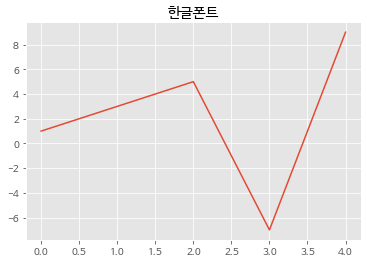

In [12]:
# 한글폰트 확인하기
import pandas as pd

pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

In [20]:
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [22]:
df["Market"].value_counts()

KOSPI     5032
KOSDAQ    1494
KONEX      143
Name: Market, dtype: int64

<AxesSubplot:>

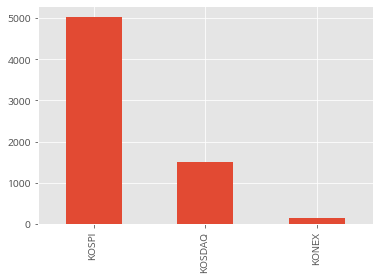

In [30]:
df["Market"].value_counts().plot.bar()

<AxesSubplot:xlabel='Market', ylabel='count'>

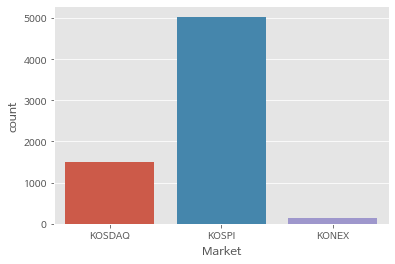

In [35]:
sns.countplot(data=df, x="Market")

In [67]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.

df.value_counts("Sector")
sector_count_top = df.value_counts("Sector").head(30)
sector_count_top

Sector
특수 목적용 기계 제조업                            141
소프트웨어 개발 및 공급업                           135
전자부품 제조업                                 121
자동차 신품 부품 제조업                             97
기타 금융업                                    93
의약품 제조업                                   93
기타 화학제품 제조업                               90
통신 및 방송 장비 제조업                            72
금융 지원 서비스업                                71
반도체 제조업                                   57
1차 철강 제조업                                 57
자연과학 및 공학 연구개발업                           53
의료용 기기 제조업                                50
일반 목적용 기계 제조업                             44
기초 화학물질 제조업                               43
플라스틱제품 제조업                                43
기타 전문 도매업                                 42
기초 의약물질 및 생물학적 제제 제조업                     38
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   35
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         34
영화, 비디오물, 방송프로그램 제작 및 배급업                 34
기타 식품 제조업                                 33
의료용

<AxesSubplot:title={'center':'Sector 빈도수'}, ylabel='Sector'>

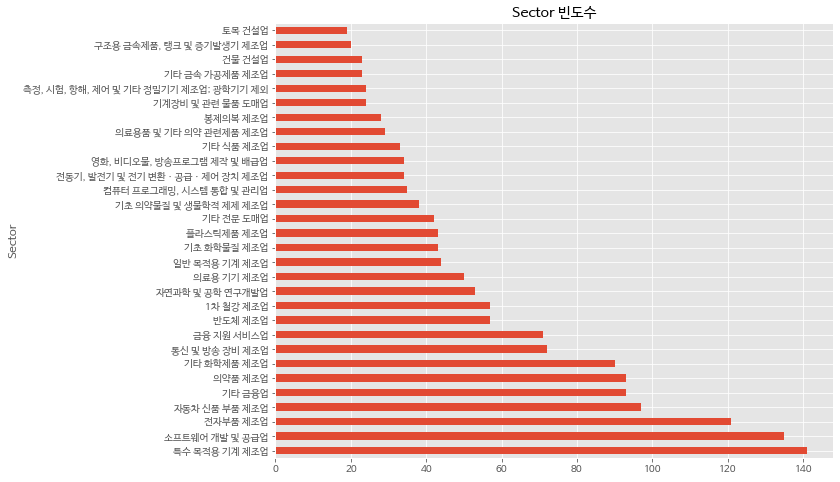

In [65]:
sector_count_top.plot.barh(figsize=(10, 8), title="Sector 빈도수")

<AxesSubplot:xlabel='count', ylabel='Sector'>

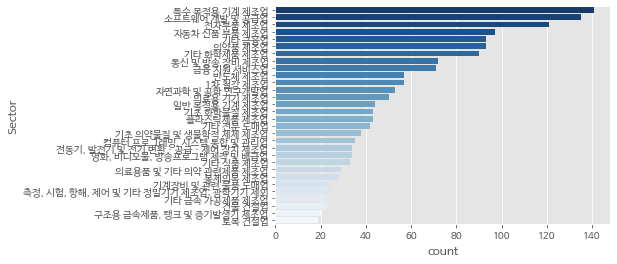

In [85]:
sector_count_top.index
df[df["Sector"].isin(sector_count_top.index)]
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)], y="Sector")
# sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)], y="Sector", order=sector_count_top.index)
sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)], y="Sector", palette="Blues_r",
              order=sector_count_top.index)

In [86]:
# 빈도수가 가장 많은 데이터 색인하기
df["Sector"] == "특수 목적용 기계 제조업"
df[df["Sector"] == "특수 목적용 기계 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
79,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도
99,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,김덕준,http://www.gst-in.com,경기도
122,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도
...,...,...,...,...,...,...,...,...,...,...
6629,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시
6630,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시
6646,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도
6660,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도


In [89]:
# Industry 의 빈도수를 구합니다.
df["Industry"].value_counts()

기업인수합병                                       36
지주회사                                         19
지주사업                                          9
모바일게임                                         7
화장품                                           7
                                             ..
섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입     1
반도체용링및전극                                      1
주강,주물 제조,도매                                   1
알루미늄제품,샷시 제조                                  1
합성운모 플레이크, 파우더, 테이프                           1
Name: Industry, Length: 2242, dtype: int64

<AxesSubplot:>

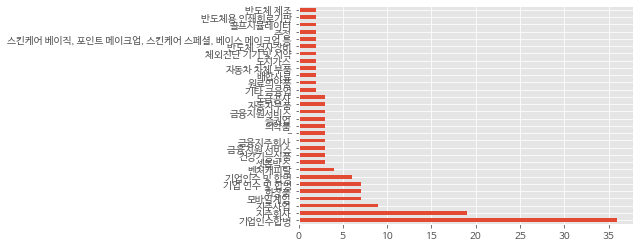

In [93]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
df["Industry"].value_counts().head(30).plot.barh()

<AxesSubplot:>

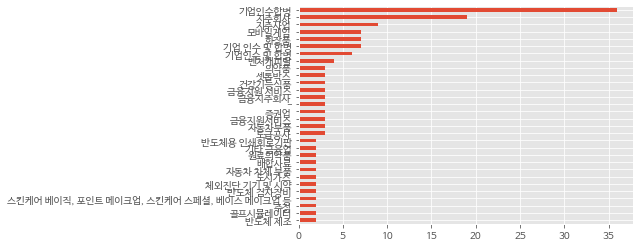

In [96]:
# sort_values 기능을 사용해 반대로 정렬해서 표시합니다.
df["Industry"].value_counts().head(30).sort_values().plot.barh()

<AxesSubplot:>

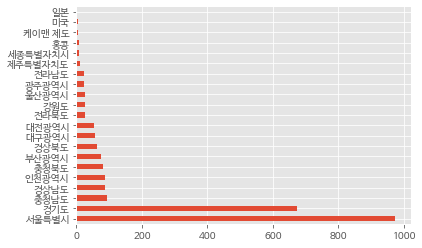

In [103]:
# Region 의 빈도수를 구합니다.
# value_counts() 통해 지역별 상장회사의 빈도수를 봅니다.
df["Region"].value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='Region'>

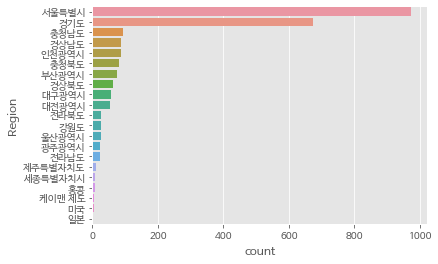

In [106]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
# sns.countplot(data=df, y="Region")
sns.countplot(data=df, y="Region", order=df["Region"].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Region'>

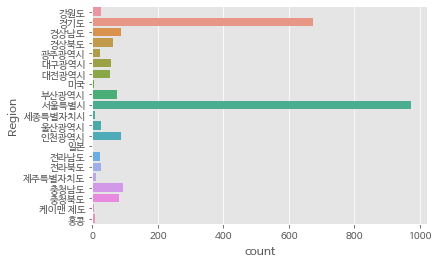

In [108]:
# Region 을 기준으로 정렬합니다.
sns.countplot(data=df.sort_values(by="Region"), y="Region")

In [111]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,37,0,7,6,1,7,0,1,54,...,0,4,0,3,1,1,4,9,0,0
KOSDAQ,16,492,49,37,9,34,38,5,38,511,...,10,57,3,13,15,2,63,59,4,9
KOSPI,4,145,40,19,9,21,8,0,37,408,...,16,25,0,7,11,7,26,14,1,0


<AxesSubplot:xlabel='count', ylabel='Region'>

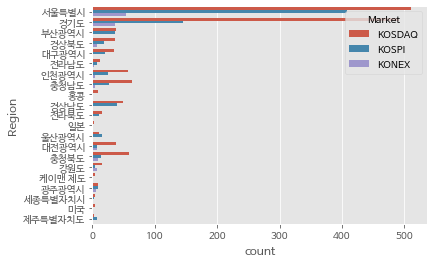

In [117]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
sns.countplot(data=df, y="Region", hue="Market")

In [133]:
# Market, ListingYear 빈도수 구하기
df_market_year = pd.crosstab(df["Market"], df["ListingYear"])

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

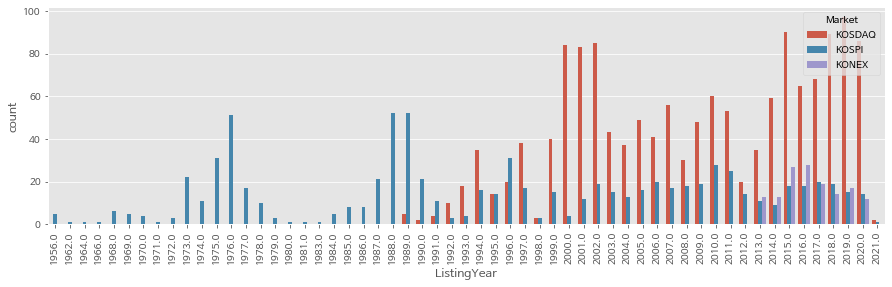

In [131]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

<AxesSubplot:xlabel='ListingYear'>

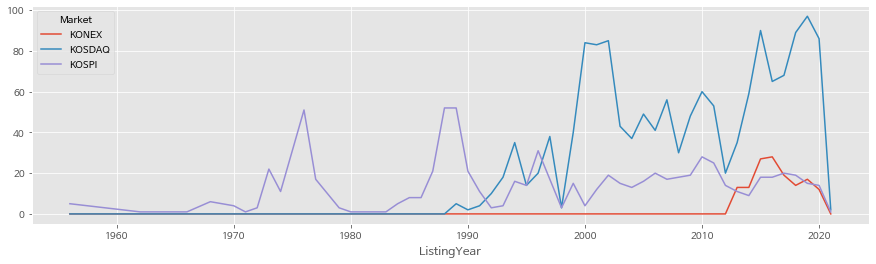

In [138]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot 으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.
# 행과열 바꾸기
df_market_year.T.plot(figsize=(15, 4))
# df_market_year.plot()

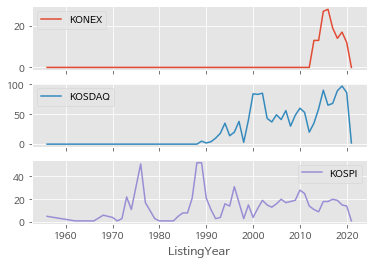

In [142]:
# 컬럼값을 subplots 으로 그립니다.
# 아무 변수에나 담아주면 로그 출력되지 않음
g = df_market_year.T.plot(subplots=True)

<AxesSubplot:xlabel='ListingYear'>

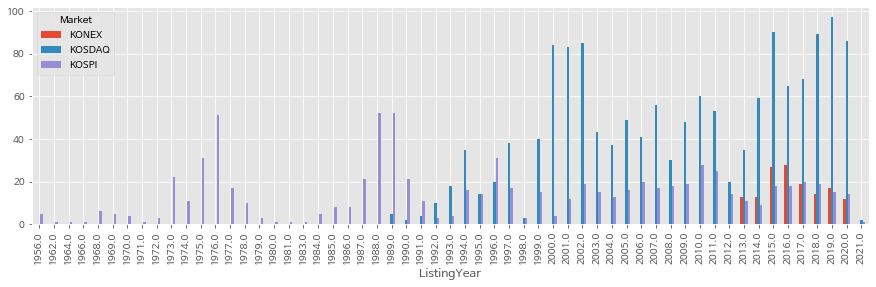

In [145]:
# Pandas plot 기능 활용하여 막대 그래프를 그립니다.
df_market_year.T.plot.bar(figsize=(15, 4))

In [154]:
# 막대(bar)그래프 그리기
df_market_year.columns = df_market_year.columns.astype(int)

<AxesSubplot:xlabel='ListingYear'>

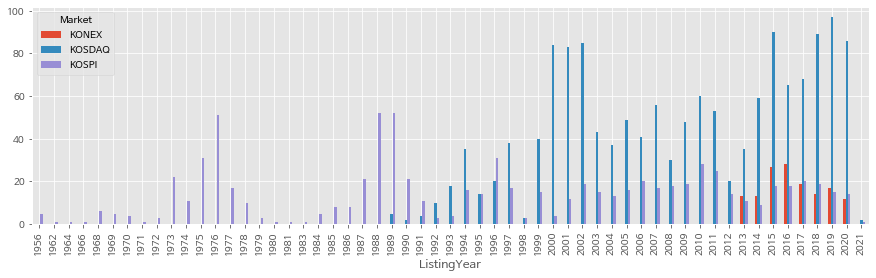

In [157]:
df_market_year.T.plot.bar(figsize=(15, 4))

In [178]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
df_year_market = df.groupby(
    ["ListingYear", "Market"])["Symbol"].count().reset_index(name="count")
df_year_market

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86
95,2020.0,KOSPI,14
96,2021.0,KOSDAQ,2


In [185]:
# pivot_table 로 같은 결과가 나오게 연산하기
df_year_market = pd.pivot_table(data=df, index=["ListingYear", "Market"], values="Symbol", aggfunc="count")
df_year_market.reset_index()
df_year_market = df_year_market.rename(columns={"Symbol":"count"})
df_year_market

count
ListingYear Market       
1956.0      KOSPI       5
1962.0      KOSPI       1
1964.0      KOSPI       1
1966.0      KOSPI       1
1968.0      KOSPI       6
...                   ...
2020.0      KONEX      12
            KOSDAQ     86
            KOSPI      14
2021.0      KOSDAQ      2
            KOSPI       1

[98 rows x 1 columns]

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

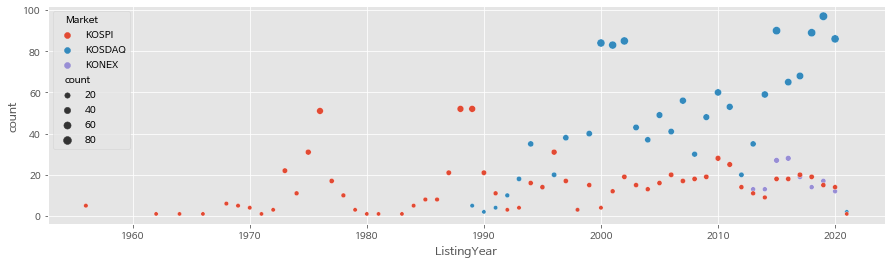

In [191]:
# 위의 groupby 결과를 scatterplot 으로 그립니다.
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df_year_market, x="ListingYear", y="count", hue="Market", size="count")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

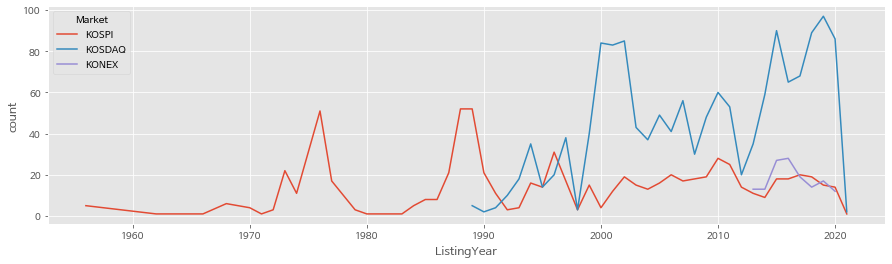

In [196]:
# lineplot 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_year_market, x="ListingYear", y="count", hue="Market", ci=None)

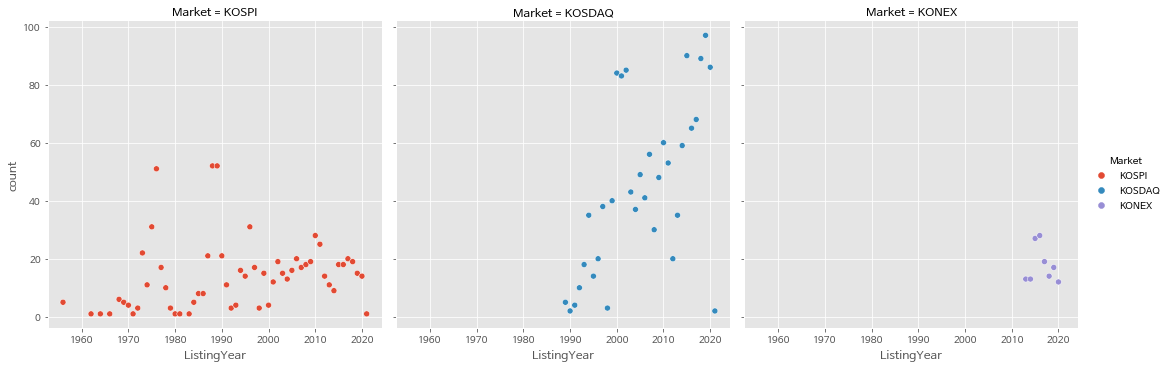

In [204]:
# relplot 으로 subplot 그리기 - scatter
sns.relplot(data=df_year_market, x="ListingYear", y="count", col="Market", hue="Market")

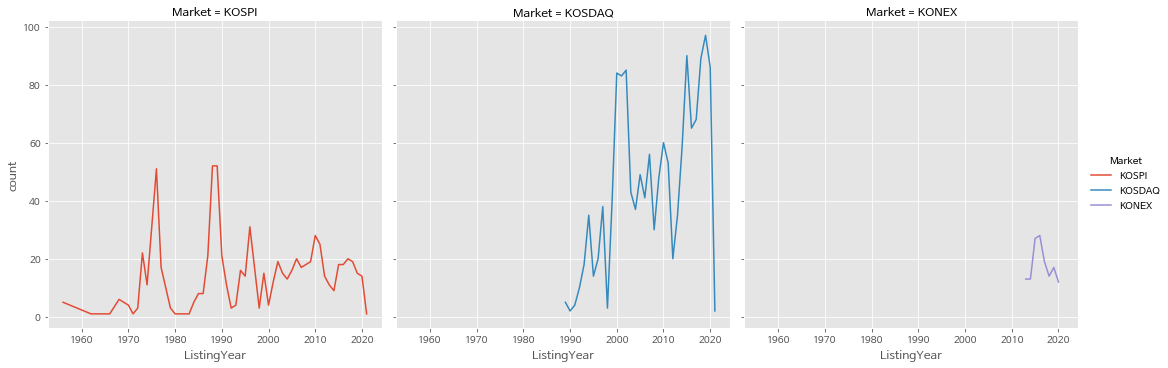

In [205]:
sns.relplot(data=df_year_market, x="ListingYear", y="count", col="Market", hue="Market", kind="line")